# Plots and Numbers for Pension Slideshow
Plan to give presentation 10AM Tuesday Nov 3
What I need to generate:

 - How big is calculated pension cost overall?
 - What % of total retirement benefits are paid to each agency? 2 pie charts: first where payouts to non-carceral agencies is other, and a second looking at just carceral agencies
 - What % of total payout benefits are paid to each agency?
 - Find a way to visualize DOC Missing data issue
 - What % of non-teacher payroll goes to cops in each municipality? 


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import sys
import os
from sodapy import Socrata

# How big is calculated pension cost overall?

Around 114 million per year or 12% of total according to this methodology. This isn't exact as we've made some tweaks to the methodology that will slightly change this number

## What % of total payouts go to carceral agencies?

In [4]:
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/pensions")
from State_Pensions_2Ver import by_agency, get_cthru_pension_payouts, as_pcnt_of_total
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 18), "lines.linewidth": 5})
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [5]:
pensions_statewide = by_agency(False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/pensions/State_Pensions_2Ver.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [6]:
state_pension_payouts = get_cthru_pension_payouts(False)

In [7]:
payout_pcnt = as_pcnt_of_total(state_pension_payouts, False)

In [8]:
payout_pcnt.loc["Non-carceral payouts"] = 1 - payout_pcnt.sum()

In [11]:
avg_payout_pcnt = payout_pcnt.mean(axis=1)

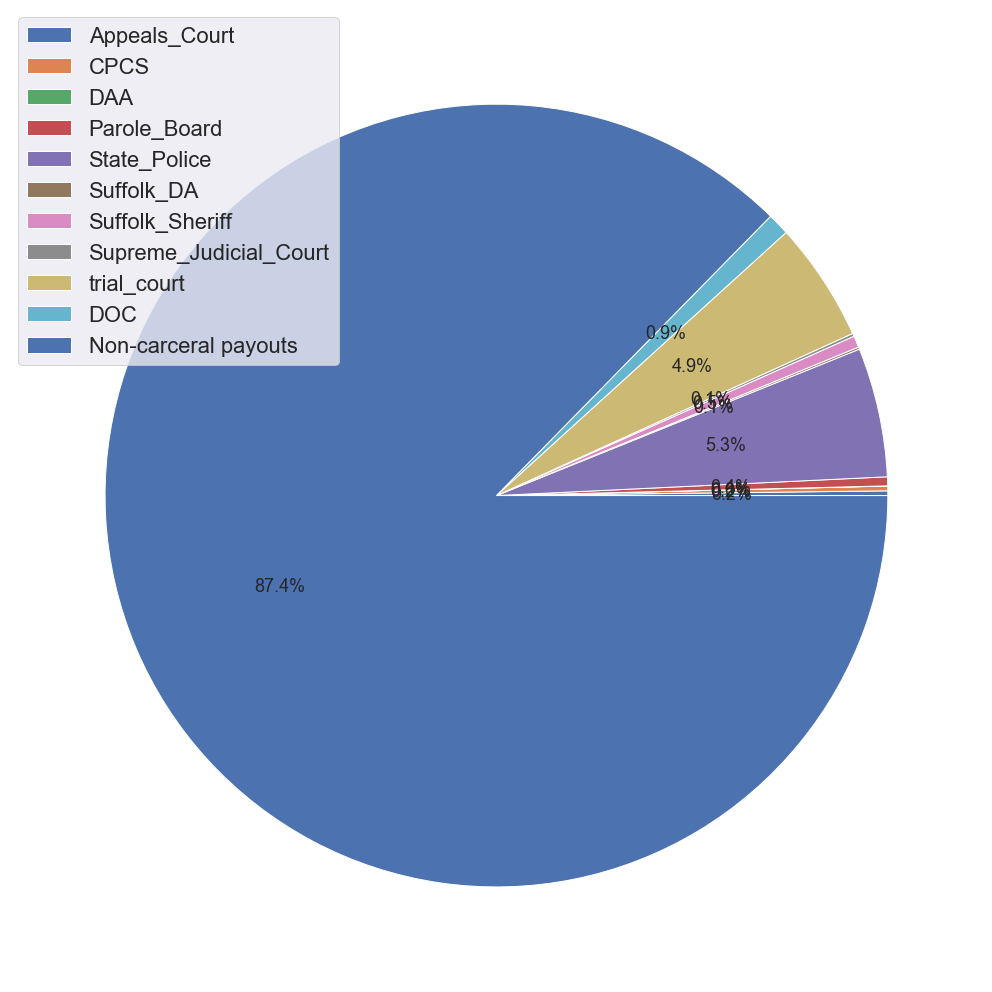

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(avg_payout_pcnt.values, autopct='%1.1f%%',  textprops={'fontsize': 18} )
ax1.legend(avg_payout_pcnt.index, prop={'size': 22})
fig1.savefig("Nov5_Figures/all_pensions_pie.png")

Next make pie chart that visualizes just payouts to carceral agencies

In [22]:
carceral_pension_payouts= payout_pcnt.drop("Non-carceral payouts").mean(axis=1)

In [23]:
1- carceral_pension_payouts.sum()

0.8735052869207469

In [24]:
carceral_pension_payouts = carceral_pension_payouts/carceral_pension_payouts.sum()

In [16]:
# carceral_state_pension_payouts = state_pension_payouts[state_pension_payouts["agency_class"].isna()==False]

In [18]:
# carceral_payouts = carceral_state_pension_payouts.groupby("agency_class").sum()["annual_amount"]

In [19]:
# carceral_payout_pcnt = carceral_payouts/carceral_payouts.sum()

In [25]:
carceral_pension_payouts

agency_class
Appeals_Court             0.015198
CPCS                      0.015562
DAA                       0.000413
Parole_Board              0.029262
State_Police              0.421993
Suffolk_DA                0.007164
Suffolk_Sheriff           0.037914
Supreme_Judicial_Court    0.009767
trial_court               0.390476
DOC                       0.072252
dtype: float64

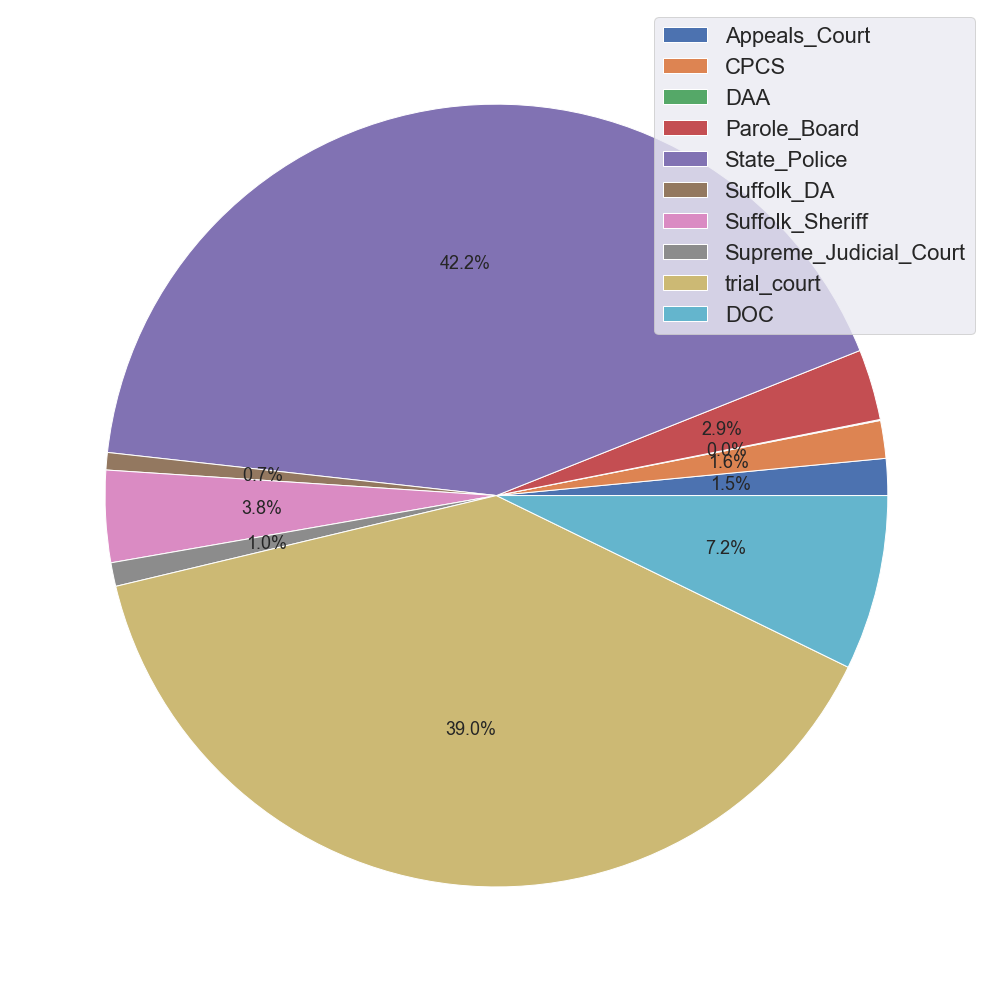

In [30]:
fig2, ax2 = plt.subplots()
patches, texts, autotexts = ax2.pie(carceral_pension_payouts.values, autopct='%1.1f%%',  textprops={'fontsize': 18} )
ax2.legend(carceral_pension_payouts.index, prop={'size': 22})
fig2.savefig("Nov5_Figures/carceral_pensions_pie.png")

## Next find each agency payroll as % of total payroll

Save this for last as it requires writing new code

## Visualize DOC Missing data issue

In [39]:
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory")
from Find_Data import find_data
app_token = "2Qa1WiG8G4kj1vGVd2noK7zP0"
client = Socrata("cthru.data.socrata.com", app_token)
DOC_SOQL = "(department_last_worked_in LIKE '%Corrections%')"
DOC_pensions = find_data(False, client, "pni4-392n", DOC_SOQL, "cthru_DOC_retirement_benefits.csv")

In [40]:
by_year = DOC_pensions.groupby(["year", "department_last_worked_in"]).sum()["annual_amount"]

In [41]:
by_year = pd.DataFrame(by_year).reset_index()

In [42]:
by_year

,year,department_last_worked_in,annual_amount
0,2011,Corrections - Transportation,3.472452e+05
1,2011,Corrections Reintr. Unit,5.541720e+04
2,2011,Corrections Training Academy,5.947608e+04
3,2011,Dept Of Corrections,1.351214e+06
4,2011,Parole Board,4.323567e+06
...,...,...,...
65,2020,Department Corrections,1.601939e+08
66,2020,Dept Of Corrections,2.170778e+06
67,2020,Parole Board,8.897961e+06
68,2020,Shattuck Unit - Corrections,5.581476e+04


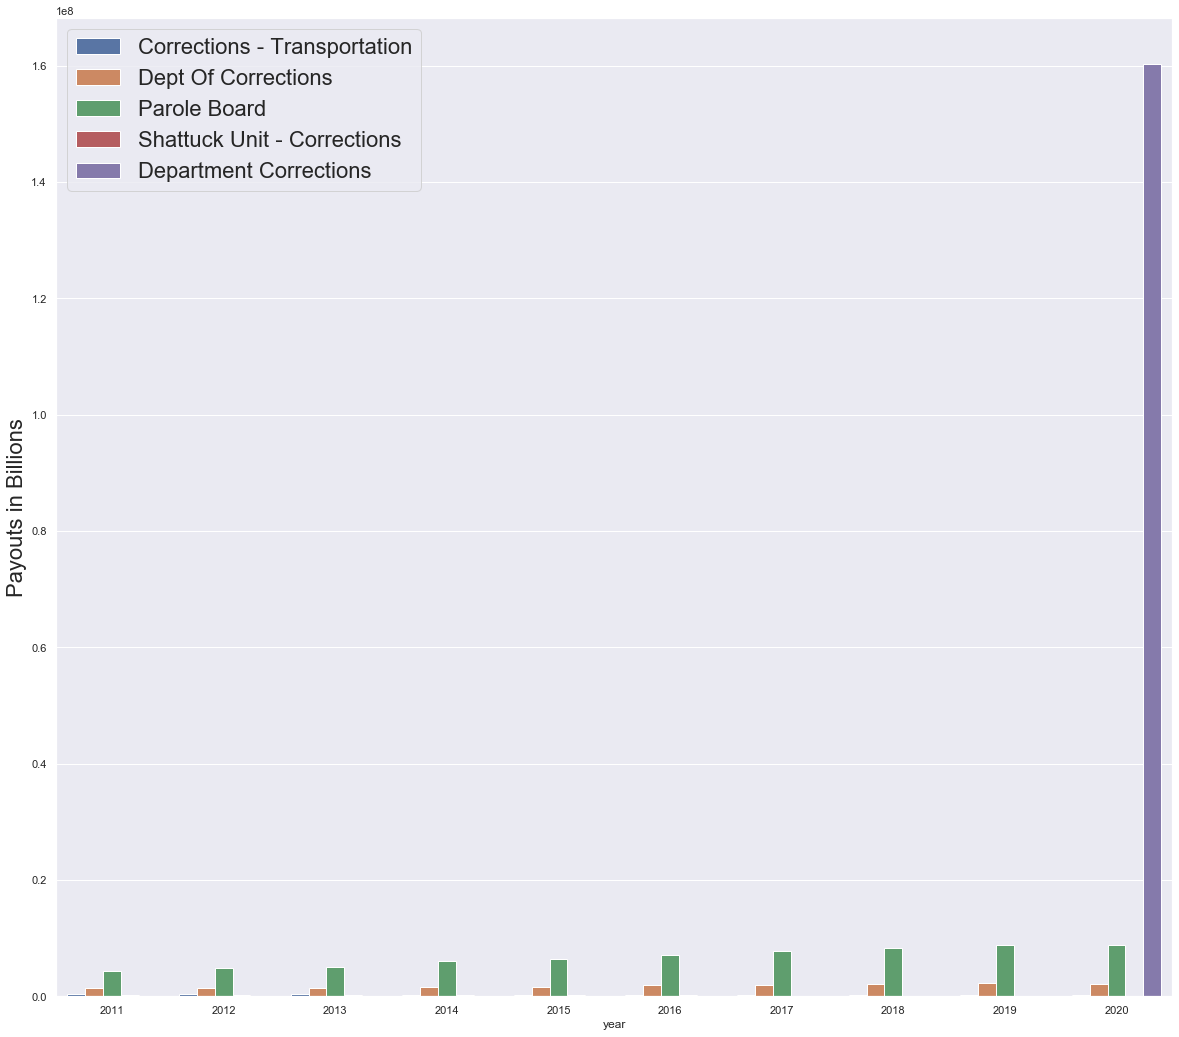

In [43]:
fig, ax = plt.subplots(1, 1)
# plt.ticklabel_format(style='plain', axis='y')
p = sns.barplot(x="year", y="annual_amount", hue="department_last_worked_in", 
#                 palette=palette, 
                data=by_year[by_year["annual_amount"]>100000])
p.legend(prop={"size":22})
p.set_ylabel("Payouts in Billions", fontsize=22)
fig.savefig("Nov5_Figures/DOC_PreCorrection.png")

Following code is taken from DOC_pensions function in State_Pensions_2Ver.py

In [44]:
lump_sum = DOC_pensions[DOC_pensions["department_last_worked_in"] == "Department Corrections"]["annual_amount"].sum()
by_year_pcnt = DOC_pensions[DOC_pensions["department_last_worked_in"] != "Department Corrections"]\
                    .groupby("year").sum()["annual_amount"]
by_year_fraction = by_year_pcnt/DOC_pensions[DOC_pensions["department_last_worked_in"] != "Department Corrections"]\
                   ["annual_amount"].sum()

In [54]:
corrected_DOC = pd.DataFrame(by_year_fraction*lump_sum).reset_index()

In [55]:
corrected_DOC["department_last_worked_in"] = "Corrected DOC"

In [56]:
corrected_DOC

,year,annual_amount,department_last_worked_in
0,2011,1.117744e+07,Corrected DOC
1,2012,1.226261e+07,Corrected DOC
2,2013,1.277258e+07,Corrected DOC
3,2014,1.453224e+07,Corrected DOC
4,2015,1.528198e+07,Corrected DOC
5,2016,1.672186e+07,Corrected DOC
6,2017,1.778695e+07,Corrected DOC
7,2018,1.915864e+07,Corrected DOC
8,2019,2.035047e+07,Corrected DOC
9,2020,2.014915e+07,Corrected DOC


In [67]:
corrected_gb = pd.concat([by_year[by_year["department_last_worked_in"] != "Department Corrections"], corrected_DOC])

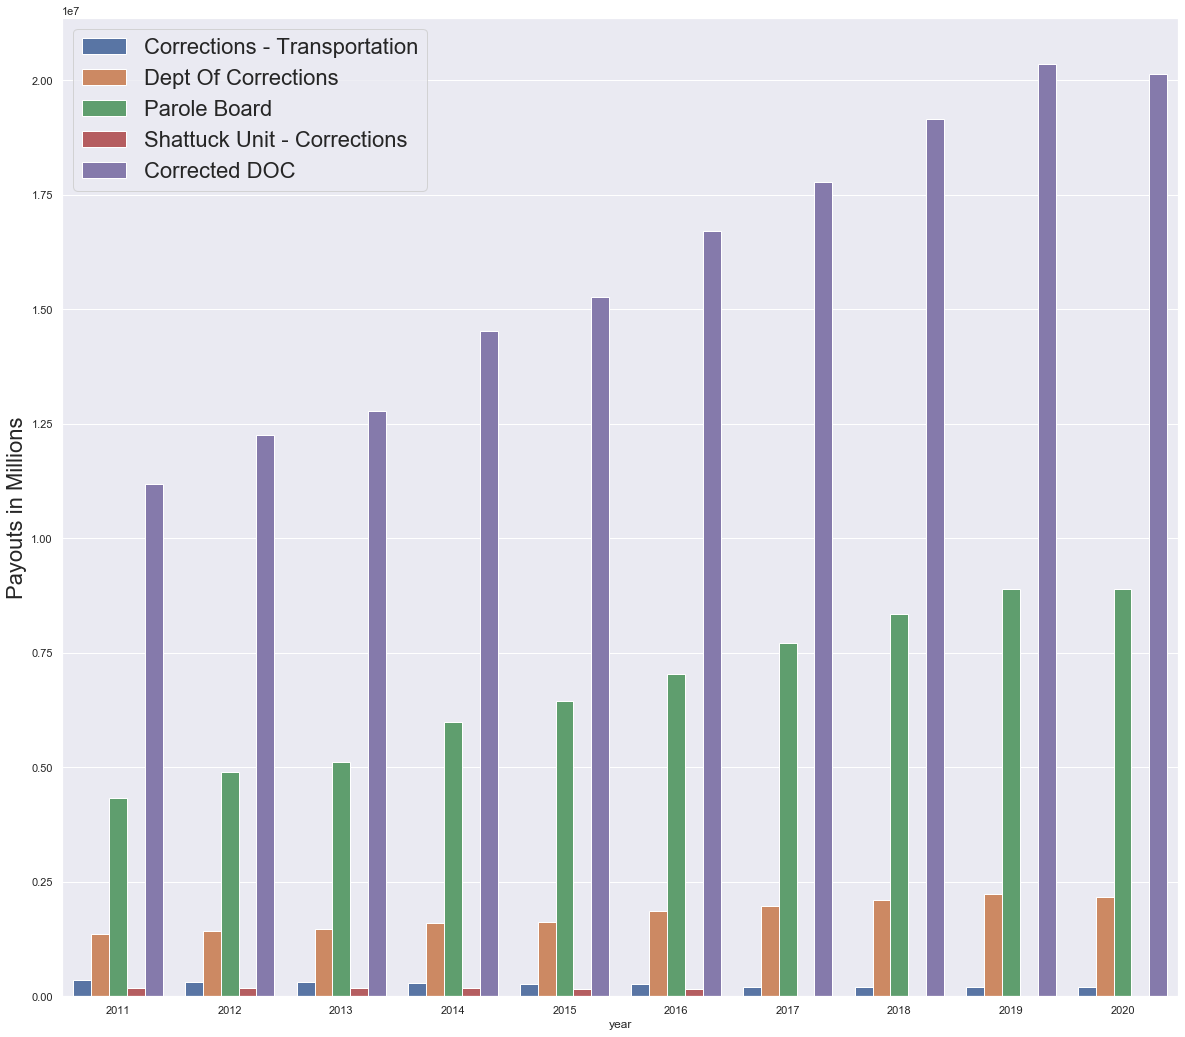

In [70]:
fig, ax = plt.subplots(1, 1)
# plt.ticklabel_format(style='plain', axis='y')
p = sns.barplot(x="year", y="annual_amount", hue="department_last_worked_in", 
#                 palette=palette, 
                data=corrected_gb[corrected_gb["annual_amount"]>100000])
p.legend(prop={"size":22})
p.set_ylabel("Payouts in Millions", fontsize=22)
fig.savefig("Nov5_Figures/DOC_Corrected.png")

Unclear why so much of the DOC dollars got listed under 2020. Could be a data entry error or some weird accounting thing. The way I addressed this is that I made the assumption that the purple bar represents dollars that were really paid out 2011-2020. My steps to solving

    1) Take out the payouts to former employees of "Department Corrections" ie the purple bar
    2) Of the remaining money, find out what % of the total was paid out each year. What I got was something like 8% paid out in 2011 and 12% paid out in 2020 and it linearly increases in between. 
    3) Assume the % of the purple bar paid out each year is equal to % of the other DOC dollars paid out that year. 

Using this estimation the DOC pensions are still rather small, DOC is an agency with a 130% larger budget than the state police but the DOC pension payouts are about a third of the total state police pension payouts. 


## What percentage of non-teacher payroll goes to cops in each city?

In [40]:
from LocalPD_True_Payroll import True_Earnings
from Local_PD_Pensions import BostonPD_Pensions

In [32]:
boston_total_earnings, boston_PD_fraction_non_teacher, boston_PD_fraction_total, boston_PD_payroll = True_Earnings("Boston PD")


In [42]:
BostonPD_Pensions(boston_PD_fraction_non_teacher).mean()

95574923.62125698

In [46]:
boston_pcnt_payroll = pd.Series()
boston_pcnt_payroll.loc["Boston PD Non-Teacher Payroll"] = boston_PD_fraction_non_teacher.mean()
boston_pcnt_payroll.loc["Boston Other Non-Teacher Payroll"] = 1 - boston_pcnt_payroll.loc["Boston PD Non-Teacher Payroll"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


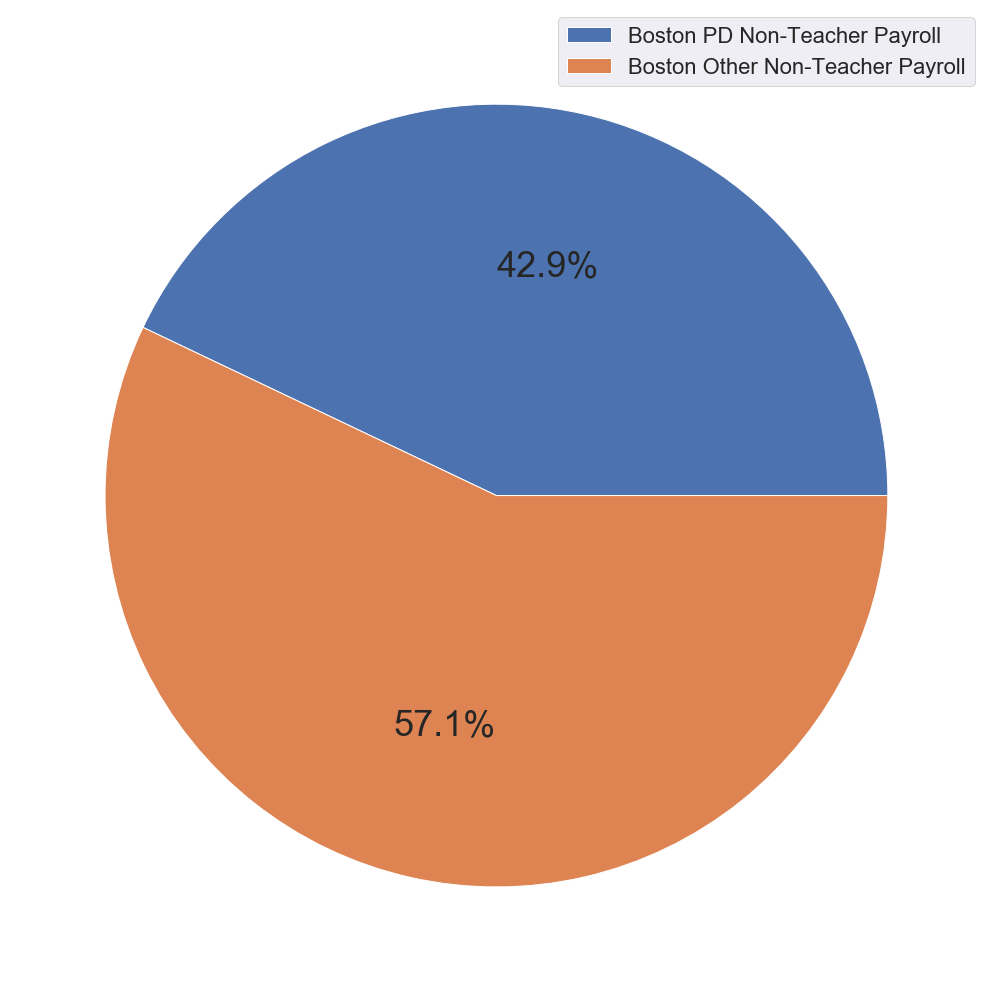

In [66]:
fig_bos, ax_bos = plt.subplots()
ax_bos.pie(boston_pcnt_payroll.values, autopct='%1.1f%%',  textprops={'fontsize': 36} )
ax_bos.legend(boston_pcnt_payroll.index, prop={'size': 22})
fig_bos.savefig("Nov5_Figures/Boston_Pensions_Pie.png")


In [55]:
chelsea_total_earnings, chelsea_PD_fraction_non_teacher, chelsea_PD_fraction_total, chelsea_PD_payroll = True_Earnings("Chelsea PD")


In [56]:
chelsea_PD_fraction_non_teacher

fiscalyear
2017    0.404154
2018    0.393793
2019    0.407361
2016    0.414514
Name: totalpay, dtype: float64

In [57]:
chelsea_pcnt_payroll = pd.Series()
chelsea_pcnt_payroll.loc["Chelsea PD Non-Teacher Payroll"] = chelsea_PD_fraction_non_teacher.mean()
chelsea_pcnt_payroll.loc["Chelsea Other Non-Teacher Payroll"] = 1 - chelsea_pcnt_payroll.loc["Chelsea PD Non-Teacher Payroll"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


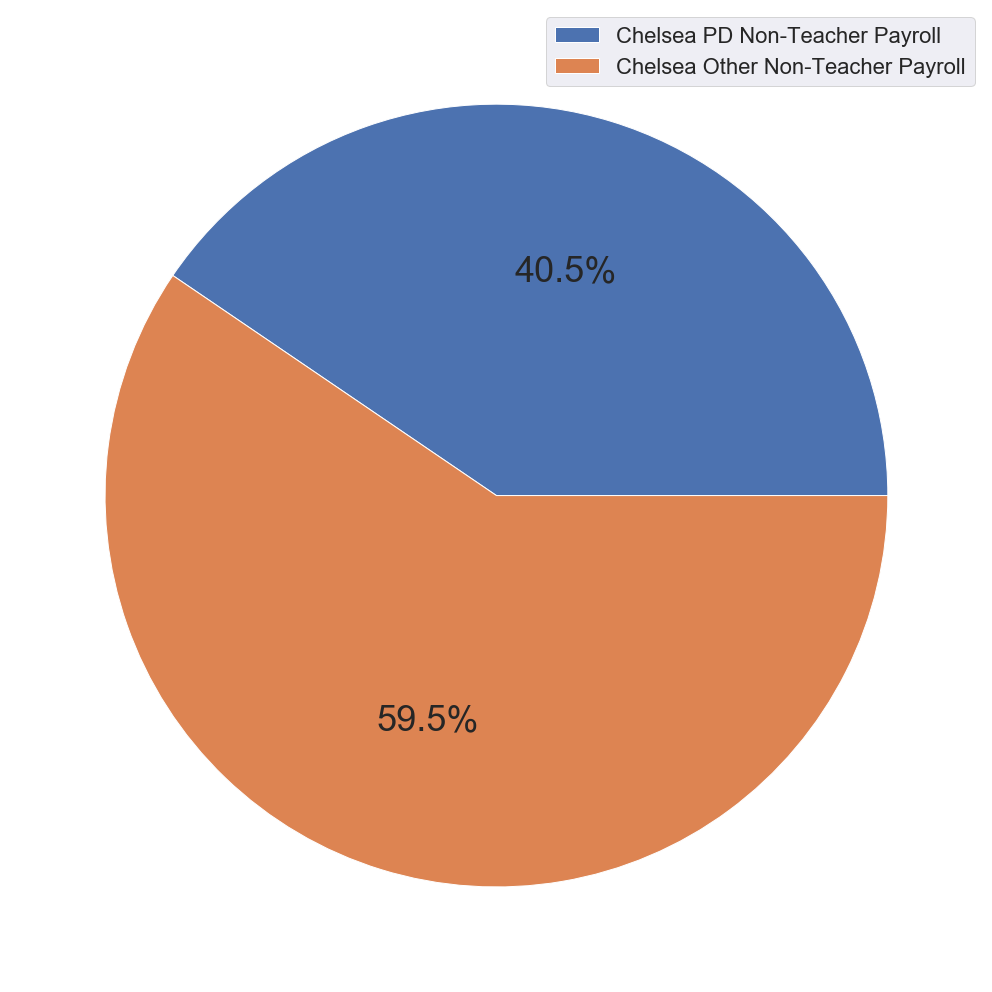

In [67]:
fig_chel, ax_chel = plt.subplots()
ax_chel.pie(chelsea_pcnt_payroll.values, autopct='%1.1f%%',  textprops={'fontsize': 36} )
ax_chel.legend(chelsea_pcnt_payroll.index, prop={'size': 22})
fig_chel.savefig("Nov5_Figures/Chelsea_Pensions_Pie.png")

In [60]:
from Initialize_Agencies_3Ver import get_agencies


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/pensions/State_Pensions_2Ver.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [61]:
agencies=get_agencies(list(range(2016,2020)))

/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:161: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:161: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()


In [62]:
reverePD=agencies["Revere PD"]
reverePD.PD_fraction

2016   0.333
2017   0.337
2018   0.335
2019   0.349
dtype: object

In [63]:
revere_pcnt_payroll = pd.Series()
revere_pcnt_payroll.loc["Revere PD Non-Teacher Payroll"] = reverePD.PD_fraction.mean()
revere_pcnt_payroll.loc["Revere Other Non-Teacher Payroll"] = 1 - revere_pcnt_payroll.loc["Revere PD Non-Teacher Payroll"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


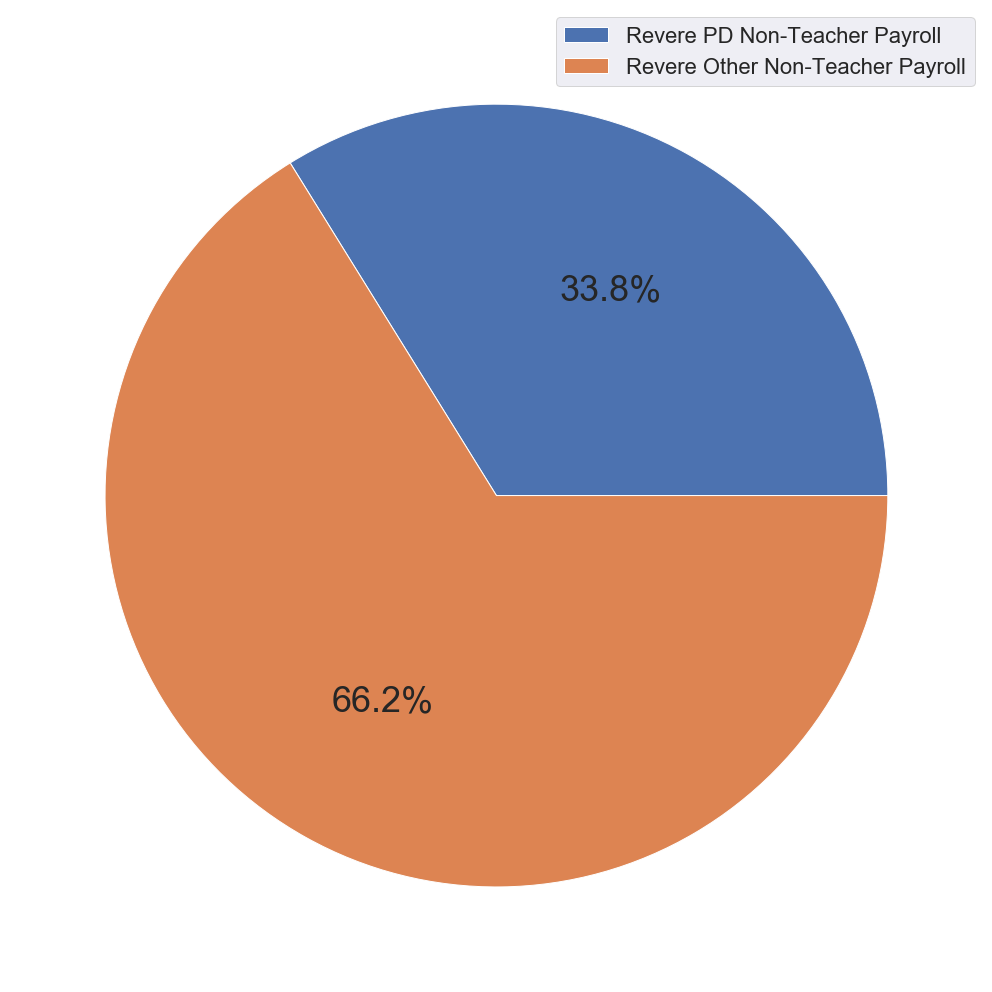

In [68]:
fig_rev, ax_rev = plt.subplots()
ax_rev.pie(revere_pcnt_payroll.values, autopct='%1.1f%%',  textprops={'fontsize': 36} )
ax_rev.legend(revere_pcnt_payroll.index, prop={'size': 22})
fig_rev.savefig("Nov5_Figures/Revere_Pensions_Pie.png")